<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [92]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [93]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
URL_Demanda = 'https://drive.google.com/file/d/1KpY2p4bfVEwGRh5tJjMx9QpH6SEwrUwH/view?usp=sharing'
df = pd.read_csv(path + URL_Demanda.split('/')[-2], usecols=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','Y'] )
dfx = df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15',]]
dfy = df[['Y']]
#dfx  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
#dfx.dropna(inplace=True)
#dfx = df.iloc[:1500, :]
#dfx.head()


In [94]:
X = dfx.to_numpy()
y = dfy.to_numpy()
X = StandardScaler().fit_transform(X)
## Crea conjuntos de datos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7, random_state = 5)

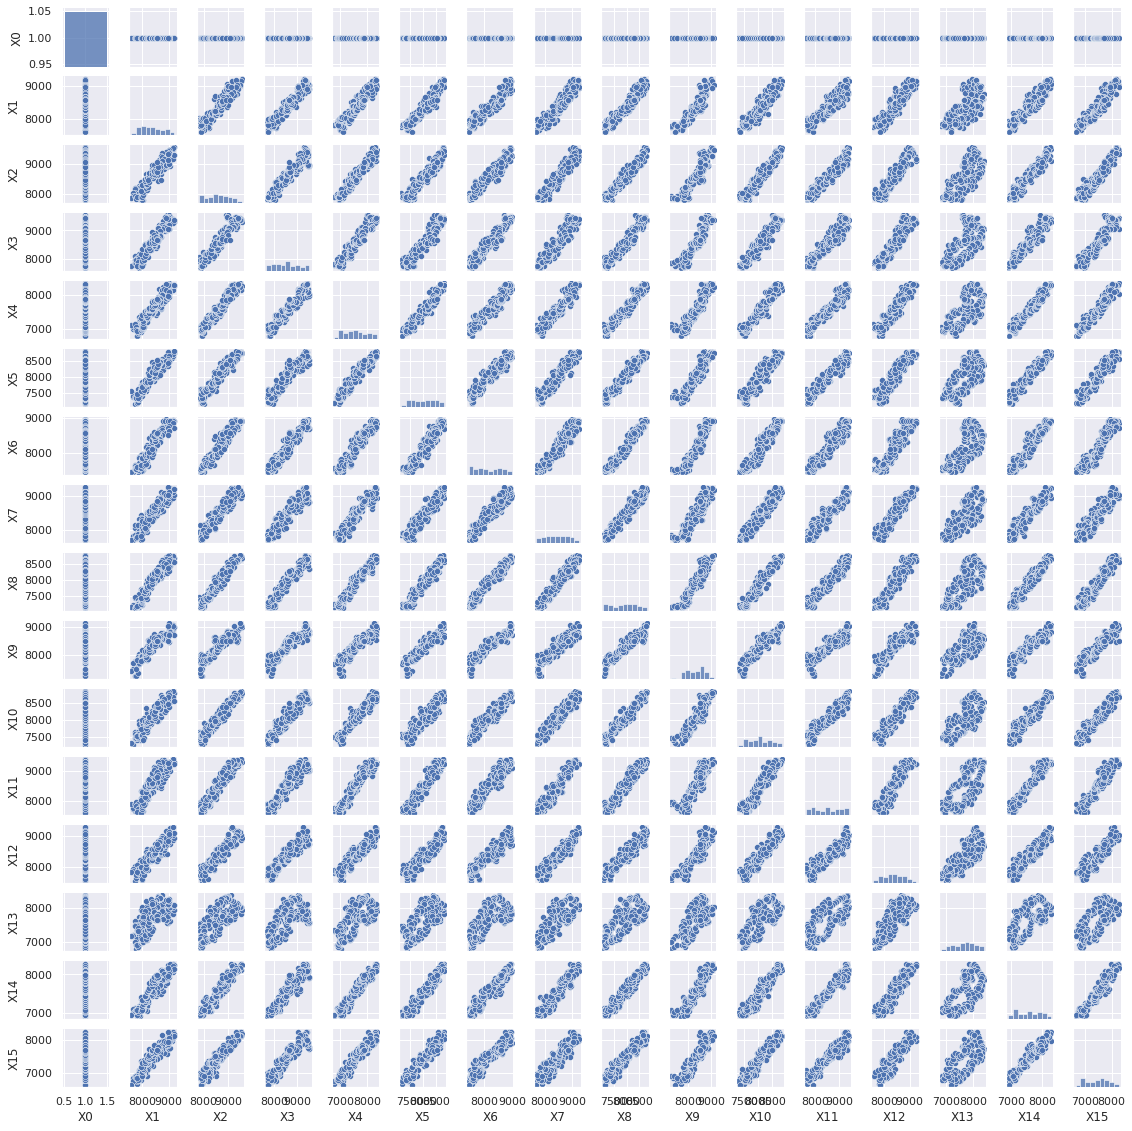

In [95]:
sns.set_theme(style = "ticks")
sns.set(font_scale=1)
sns.pairplot( dfx.iloc[0:200, :] , height=1) 

99.99999999999999


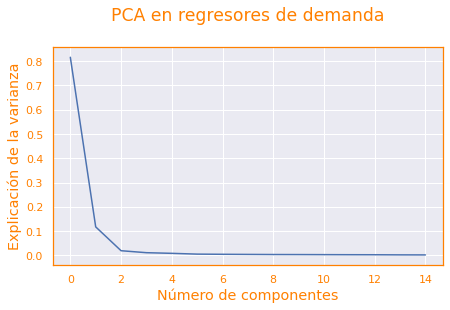

In [96]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(0.9999) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')

In [97]:
pca.components_
pca.n_components_
pca.singular_values_

array([45.76005002, 17.33166868,  6.94996583,  5.23050295,  4.53405828,
        3.50085588,  3.23922409,  3.02543168,  2.83058025,  2.74070256,
        2.59701859,  2.46018418,  2.36386027,  2.09968962,  1.95951999])

# Calculamos la regresión

In [98]:
model      = LinearRegression().fit(X_train[:, :], y_train)
err1_mae = np.mean(np.abs(y_train - model.predict(X_train)))
err1_mae_test = np.mean(np.abs(y_test - model.predict(X_test)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err1_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err1_mae_test)

# calculating VIF for each feature
for i in range(X_train.shape[1]):
    print(variance_inflation_factor(X_train,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 106.99218464060132
MAE del modelo de regresión con datos de prueba con sklearn: 132.72736859739106
nan
18.119662943309095
25.74394644625643
20.838632648427936
28.059861159170406
16.006433923651144
21.126690876349915
17.381766159996257
26.963374065857806
12.128689631883713
19.37608576097641
14.402736212718946
8.29218129819314
4.313061262614962
22.207941311962294
26.104595396524715


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [99]:
linreg_model      = LinearRegression().fit(X_pca[:, :], y_train)
err2_mae = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err2_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err2_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err2_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print(variance_inflation_factor(X_pcat,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 106.99218464060124
MAE del modelo de regresión con datos de prueba con sklearn: 132.72736859739115
1.071730038801442
1.051927927489371
1.0945330156174606
1.1234488455829055
1.087328995253417
1.089511051626358
1.19864223224759
1.056901112852952
1.116881962852075
1.0450600589023284
1.1170344896108388
1.0924827190797646
1.1356319941263282
1.0852501657171332
1.0867103231928956


98.35622905789607


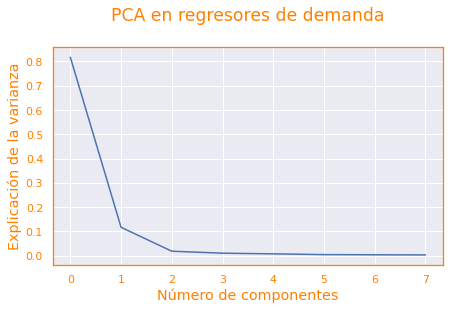

In [100]:
pca = PCA(0.98) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')

In [101]:
linreg_model  = LinearRegression().fit(X_pca[:, :], y_train)
err3_mae      = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err3_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err3_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err3_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print(variance_inflation_factor(X_pcat,i)) 

MAE del modelo de regresión con datos de entrenamiento con sklearn: 113.5530564298897
MAE del modelo de regresión con datos de prueba con sklearn: 131.74634854064172
1.0254899558298978
1.0304568025282943
1.0396454301243048
1.065322560192384
1.0404242445344138
1.0523994823110139
1.0790077296363596
1.0336835987470214


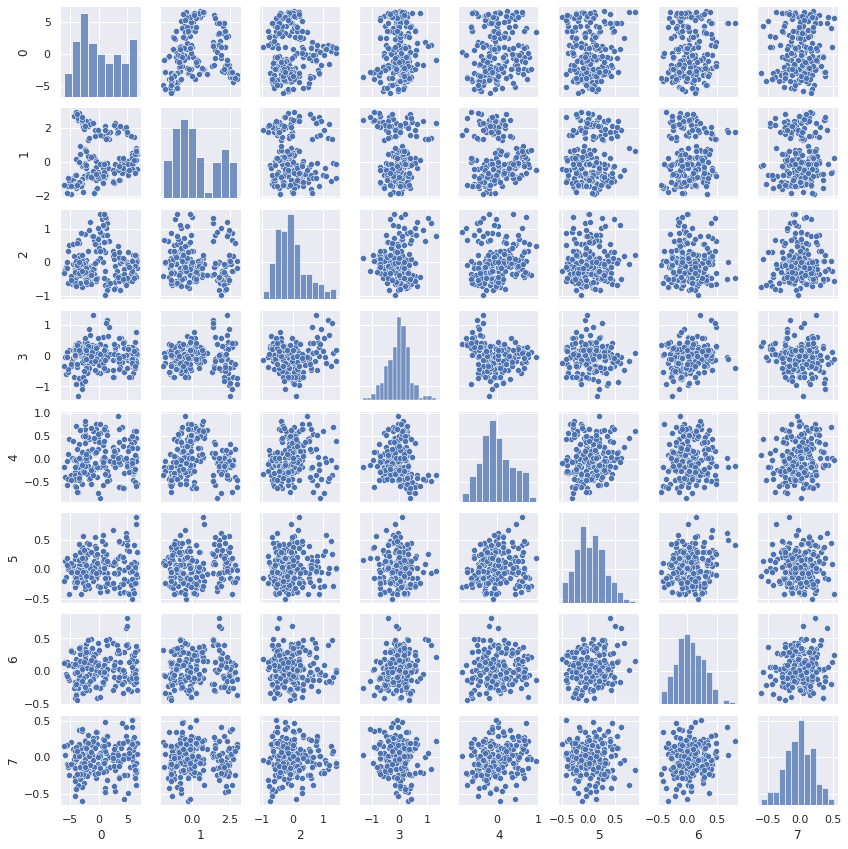

In [102]:
sns.set_theme(style = "ticks")
sns.set(font_scale=1)
sns.pairplot(pd.DataFrame(X_pcat).iloc[0:200, :], height=1.5)

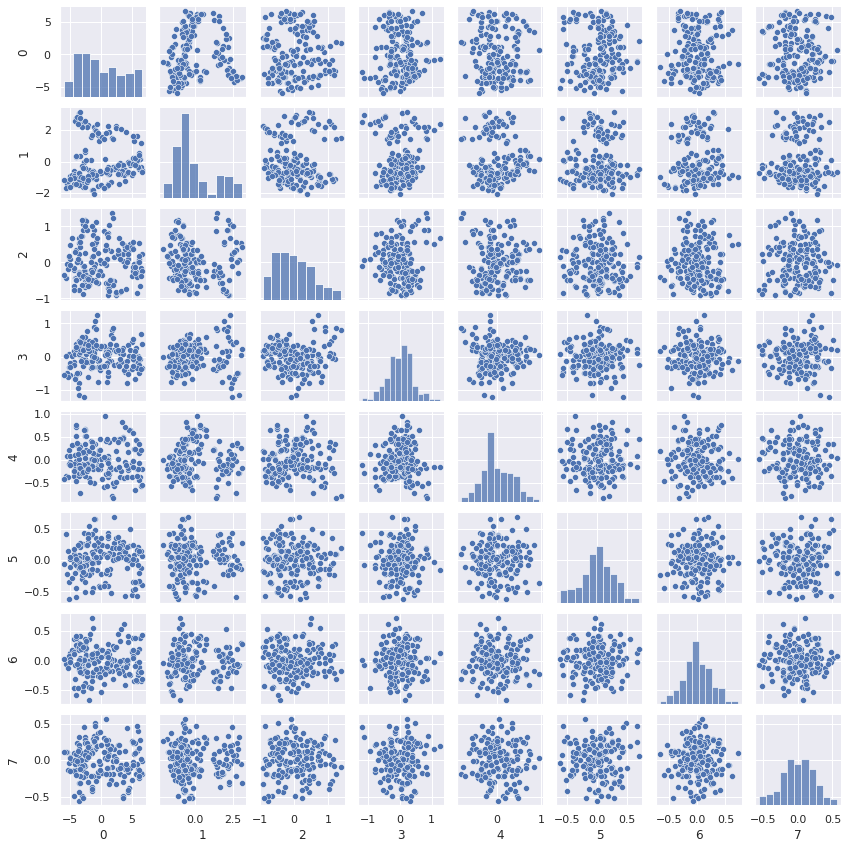

In [103]:
sns.set_theme(style = "ticks")
sns.set(font_scale=1)
sns.pairplot(pd.DataFrame(X_pca).iloc[0:200, :], height=1.5)

In [104]:
def PCAfromScratch(X , num_components):     
    X_meaned = X - np.mean(X , axis = 0)     
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    idx                 = np.argsort(eigen_values)[::-1]
    print(idx)
    sorted_eigenvalue   = eigen_values[idx]
    sorted_eigenvectors = eigen_vectors[:,idx]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, eigen_values, 

In [105]:
#Applying it to PCA function
mat_reduced ,eigen_values, = PCAfromScratch(X , 12)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced)
principal_df


[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.612177,0.886858,0.743815,-0.653376,-0.250132,0.193831,0.371031,0.137066,0.285477,0.070162,-0.055744,0.008333
1,-0.759013,0.986839,0.680469,-0.868387,-0.307714,0.243599,0.097868,-0.001062,0.471722,0.147161,0.079409,0.181589
2,-0.856388,0.919144,0.562817,-0.828861,-0.238864,0.053595,0.022902,-0.143194,0.322344,0.085662,0.142528,0.179588
3,-0.968836,0.915040,0.582649,-0.460186,-0.097788,0.021766,0.073806,0.018646,-0.052234,0.016771,0.085503,0.221062
4,-0.873109,0.943182,0.612118,-0.333751,0.130270,0.127878,-0.231935,0.352376,-0.066869,-0.144832,0.165981,0.221920
...,...,...,...,...,...,...,...,...,...,...,...,...
571,-1.878755,-1.245223,1.187565,1.179450,-0.479494,-0.007480,0.282929,-0.054950,0.057294,0.267338,0.284304,-0.243478
572,-1.672987,-1.317595,1.304296,1.140764,-0.470759,-0.054980,0.240125,-0.173817,0.120097,0.022704,0.112894,-0.109508
573,-1.672981,-1.159560,0.943183,1.224889,-0.261484,-0.211791,0.034257,-0.126317,0.091940,-0.137785,0.171675,0.132112
574,-1.781209,-1.205700,0.655523,1.112687,0.025570,-0.320074,-0.256866,-0.096642,0.085263,0.105602,0.334553,0.190307


[Eliminar multicolinealidad con PCA](https://medium.com/@awabmohammedomer/principal-component-analysis-pca-in-python-6897664f97d6#:~:text=PCA%20aims%20to%20reduce%20dimensionality,original%20data%20with%20less%20noise.)


[collinearity-and-multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

# Análisis factorial

In [106]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html?highlight=factor%20analysis#
factor = FactorAnalysis(n_components=2, random_state=0)
X_factor = factor.fit_transform(X)
X_factor.shape

(576, 2)

Análisis de componentes principales es un métodos de reducción de dimensiones que puede ser usado paraescoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras. Además otras variables isntéticas llamadas latentes o componentes en el PCA pueden explicar partes importantes del fenómeno. 

# 14.3.12 Hierarchical Clustering

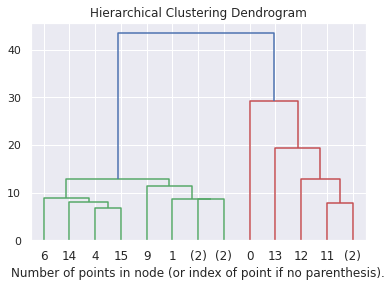

In [107]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#
#https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=Interpretaci%C3%B3n,una%20l%C3%ADnea%20horizontal%20del%20dendrograma.
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters= None)

model = model.fit(X.T)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()